In [ ]:
pip install numpy


In [ ]:
pip install pandas

In [ ]:
pip install matplotlib

In [ ]:

pip install nltk


In [ ]:

pip install nltk


In [ ]:
pip install scikit-learn


In [ ]:
pip install seaborn

Importing Required Python Libraries



In [39]:
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [40]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tahir\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
# printing the stopwords in English
print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Loading Dataset



In [42]:
# loading the dataset to a pandas DataFrame
news_dataset = pd.read_csv('train.csv')

Data Pre-Processing



In [43]:
news_dataset.shape


(20800, 5)

In [44]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


C:\Users\Tahir\AppData\Local\Temp\ipykernel_18040\1529447720.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)


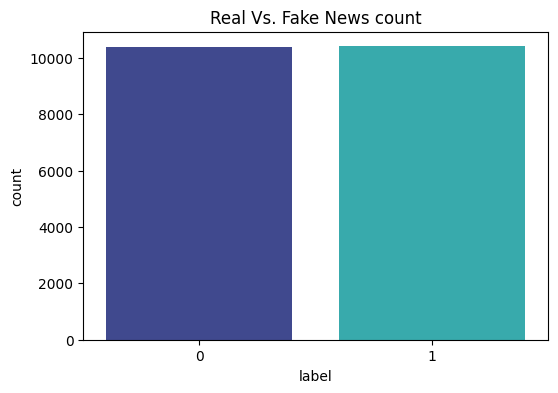

In [45]:
plt.figure(figsize = (6,4))
sns.countplot(x='label', data = news_dataset, palette = 'mako',saturation = 1)
plt.title("Real Vs. Fake News count", fontsize = 12)
plt.show()

In [46]:
# counting the number of missing values in the dataset
news_dataset.isnull().sum()


id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [47]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')


In [48]:
# separating the data & label
news_dataset = news_dataset.sample(n=500)
X = news_dataset.drop(columns='label', axis=1)
Y = news_dataset['label']
print(X)
print(Y)

          id                                              title  \
12641  12641       Changes in Rainfall Threaten Food Production   
19012  19012  A ‘Short-Circuit’ on F.B.I. Inquiry? Hillary C...   
15508  15508  Now Batting: 14 New Baseball Books - The New Y...   
20307  20307  Russia or the Neocons: Who endangers American ...   
18677  18677  Shaq: Brady’s Missing Super Bowl Jersey ’an In...   
...      ...                                                ...   
20291  20291  Survival of Sears and Kmart Is in Doubt, Owner...   
16048  16048  Former Attorney General Janet Reno has Died at 78   
2026    2026                                                      
3998    3998        6 Natural Herbs To Prevent Mental Disorders   
18569  18569  Vatican Invites ‘Population Bomb’ Hoaxer Paul ...   

                                      author  \
12641                                          
19012       Yamiche Alcindor and Amy Chozick   
15508                         Daniel M. Gold   
203

In [49]:
port_stem = PorterStemmer()


In [50]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content


In [51]:
news_dataset['text'] = news_dataset['text'].apply(stemming)
print(news_dataset['text'])

12641    chang rainfal threaten food product post oct j...
19012    washington hillari clinton friday sought expla...
15508    happen everi spring time play ball publish fil...
20307    vladimir golstein via duran polit discours ame...
18677    nba legend georgia sheriff deputi shaquil neal...
                               ...                        
20291    corpor owner sear kmart said tuesday substanti...
16048    chang former attorney gener janet reno die com...
2026                 troll ignor ignor blatantli dumb alfi
3998     natur herb prevent mental disord antioxid foun...
18569    vatican invit notori popul alarmist recent his...
Name: text, Length: 500, dtype: object


In [52]:
#separating the data and label
X = news_dataset['text'].values
Y = news_dataset['label'].values
print(X)

['chang rainfal threaten food product post oct jan rocha climat news network cattl farm road major caus deforest brazil amazon region kate evan cifor via flickr paulo un latest state food agricultur sofa report warn rainfal pattern chang drastic end centuri agricultur forestri fish serious affect becom difficult harvest crop rear anim manag forest fisheri place way say report un food agricultur organis fao major concern region latin america econom depend agricultur caribbean heavili reliant fisheri brazil northeast exampl rainfal expect decreas southeast south america cover part chile argentina could increas rainfal chang advertis squar site wide report say chang rainfal mean capac face shortag excess water fundament effort improv product sustain way separ studi carri earlier fao econom commiss latin america caribbean eclac latin american integr associatio n aladi show agricultur account region export employ econom activ popul contribut region gdp sofa report predict climat chang bring

In [53]:
print(Y)


[1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1
 1 1 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 0 0 0 1 1 0 0
 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 1
 0 1 0 0 0 1 0 1 1 1 1 0 1 1 0 0 1 0 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 1 0 0 0 1 1 1 0
 0 1 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 0 0 1 1 1 1
 1 1 0 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 1 1 0 0 1 0 1 0
 1 1 1 1 1 0 1 0 1 1 1 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1 1 1 1 1
 1 0 0 1 1 0 1 1 0 1 0 1 0 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 0 1 0
 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0
 1 1 0 1 1 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 1 0 1 1 1
 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 1 1 1 1 

In [54]:
Y.shape


(500,)

Feature Engineering (Vectorizing)



In [55]:
# converting the textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

X = vectorizer.transform(X)
print(X)
news_dataset.shape

  (np.int32(0), np.int32(53))	0.0460563115040907
  (np.int32(0), np.int32(93))	0.023018565908282523
  (np.int32(0), np.int32(125))	0.024438281901775216
  (np.int32(0), np.int32(191))	0.029799694984711102
  (np.int32(0), np.int32(208))	0.11294633604435758
  (np.int32(0), np.int32(251))	0.22671569089834598
  (np.int32(0), np.int32(300))	0.04910865642231687
  (np.int32(0), np.int32(383))	0.022786916589811947
  (np.int32(0), np.int32(392))	0.012408127875596227
  (np.int32(0), np.int32(397))	0.03699279358977874
  (np.int32(0), np.int32(400))	0.025839261508038114
  (np.int32(0), np.int32(418))	0.035620275298476965
  (np.int32(0), np.int32(420))	0.04910865642231687
  (np.int32(0), np.int32(433))	0.07986488396022541
  (np.int32(0), np.int32(434))	0.015980877983739462
  (np.int32(0), np.int32(452))	0.025342729343420606
  (np.int32(0), np.int32(515))	0.032998219424929066
  (np.int32(0), np.int32(643))	0.04910865642231687
  (np.int32(0), np.int32(648))	0.09821731284463374
  (np.int32(0), np.int32

(500, 5)

Splitting the dataset to training & test data



In [56]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
print(Y_test)

[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


WITH PACKAGE IMPLEMENTATION



In [57]:
decision_tree = DecisionTreeClassifier()

In [62]:
dt=decision_tree.fit(X_train,Y_train)
y_pred = dt.predict(X_test)


EVALUATION

1. Accuracy Score

In [63]:
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy Score: {}".format(accuracy))


Accuracy Score: 0.73


2. Classification Report

In [64]:
print('Classification Report:\n', classification_report(Y_test,y_pred,digits=5))

Classification Report:
               precision    recall  f1-score   support

           0    0.69492   0.82000   0.75229        50
           1    0.78049   0.64000   0.70330        50

    accuracy                        0.73000       100
   macro avg    0.73770   0.73000   0.72780       100
weighted avg    0.73770   0.73000   0.72780       100



Confusion Matrix

Confusion Matrix:
 [[40 10]
 [18 32]]


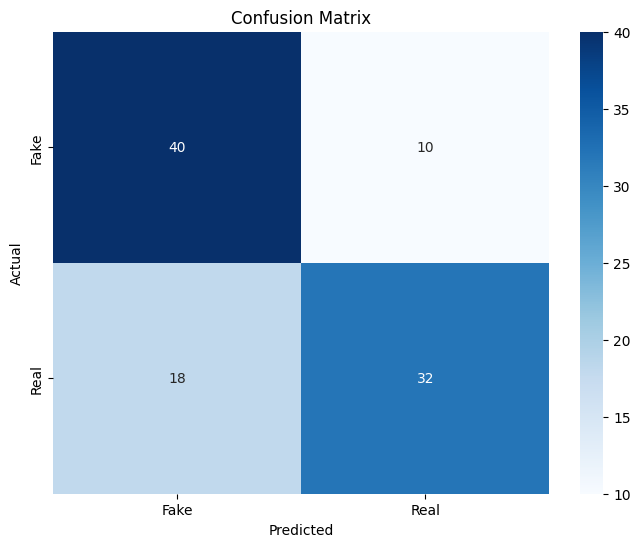

In [59]:
ConfusionMetrix = confusion_matrix(Y_test,y_pred)
print("Confusion Matrix:\n", ConfusionMetrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMetrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

WITHOUT PYTHON PACKAGE IMPLEMENTATION



In [65]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state=2)
#converting sparse matrix (csr_matrix) to array
X1_train = X1_train.toarray()
X1_test = X1_test.toarray()
print(X1_train)
print(Y1_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 1 1 0
 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1]


In [68]:
import numpy as np

class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100):
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y):
        self.tree = self._grow_tree(X, y)

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.tree) for x in X])

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_features = X.shape
        n_labels = len(np.unique(y))

        if depth >= self.max_depth or n_labels == 1 or n_samples < self.min_samples_split:
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_features, n_features, replace=False)

        best_feat, best_thresh = self._best_criteria(X, y, feat_idxs)
        left_idxs, right_idxs = self._split(X[:, best_feat], best_thresh)

        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)
        return Node(best_feat, best_thresh, left, right)

    def _best_criteria(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_thresh = None, None
        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_thresh = threshold
        return split_idx, split_thresh

    def _information_gain(self, y, X_column, split_thresh):
        parent_entropy = self._entropy(y)

        left_idxs, right_idxs = self._split(X_column, split_thresh)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        n = len(y)
        n_left, n_right = len(left_idxs), len(right_idxs)
        e_left, e_right = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_left / n) * e_left + (n_right / n) * e_right

        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log2(p) for p in ps if p > 0])

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value
        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)

class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None
def evaluate_model(model, X_test, Y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(Y_test, y_pred)
    report = classification_report(Y_test, y_pred)
    return accuracy, report


# Train the Decision Tree model from scratch
DT = DecisionTree(max_depth=4)
DT.fit(X1_train, Y1_train)

# Evaluate the model's performance
accuracy, report = evaluate_model(DT, X1_test, Y1_test)
print("Accuracy:", accuracy)
print("Classification Report:\n", report)



Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.78      0.75        50
           1       0.76      0.70      0.73        50

    accuracy                           0.74       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.74      0.74      0.74       100



Confusion Matrix

Confusion Matrix:
 [[39 11]
 [15 35]]


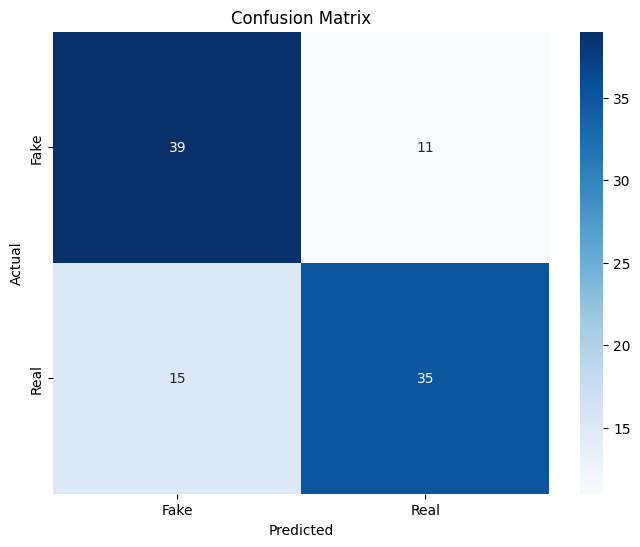

In [69]:
prediction = DT.predict(X1_test)

ConfusionMetrix = confusion_matrix(Y1_test,prediction)
print("Confusion Matrix:\n", ConfusionMetrix)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(ConfusionMetrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()